In [1]:
import pickle
import tensorflow as tf
import tensorflow.keras as kr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_x=[]
train_y=[]
for i in range(1,6):
  with open('data/data_batch_'+str(i), 'rb') as fo:
      dicto = pickle.load(fo, encoding='bytes')
  train_x.append(dicto[b'data'])
  train_y.append(dicto[b'labels']);

train_x=tf.concat(train_x,axis=0)
train_x=tf.reshape(train_x,[50000,3,32,32])
train_x=tf.transpose(train_x,[0,2,3,1])
train_y=tf.concat(train_y,axis=0)

test_x=[]
test_y=[]
with open('data/test_batch', 'rb') as fo:
    dicto = pickle.load(fo, encoding='bytes')
test_x.append(dicto[b'data'])
test_y.append(dicto[b'labels']);

test_x=tf.concat(test_x,axis=0)
test_x=tf.reshape(test_x,[10000,3,32,32])
test_x=tf.transpose(test_x,[0,2,3,1])
test_y=tf.concat(test_y,axis=0)

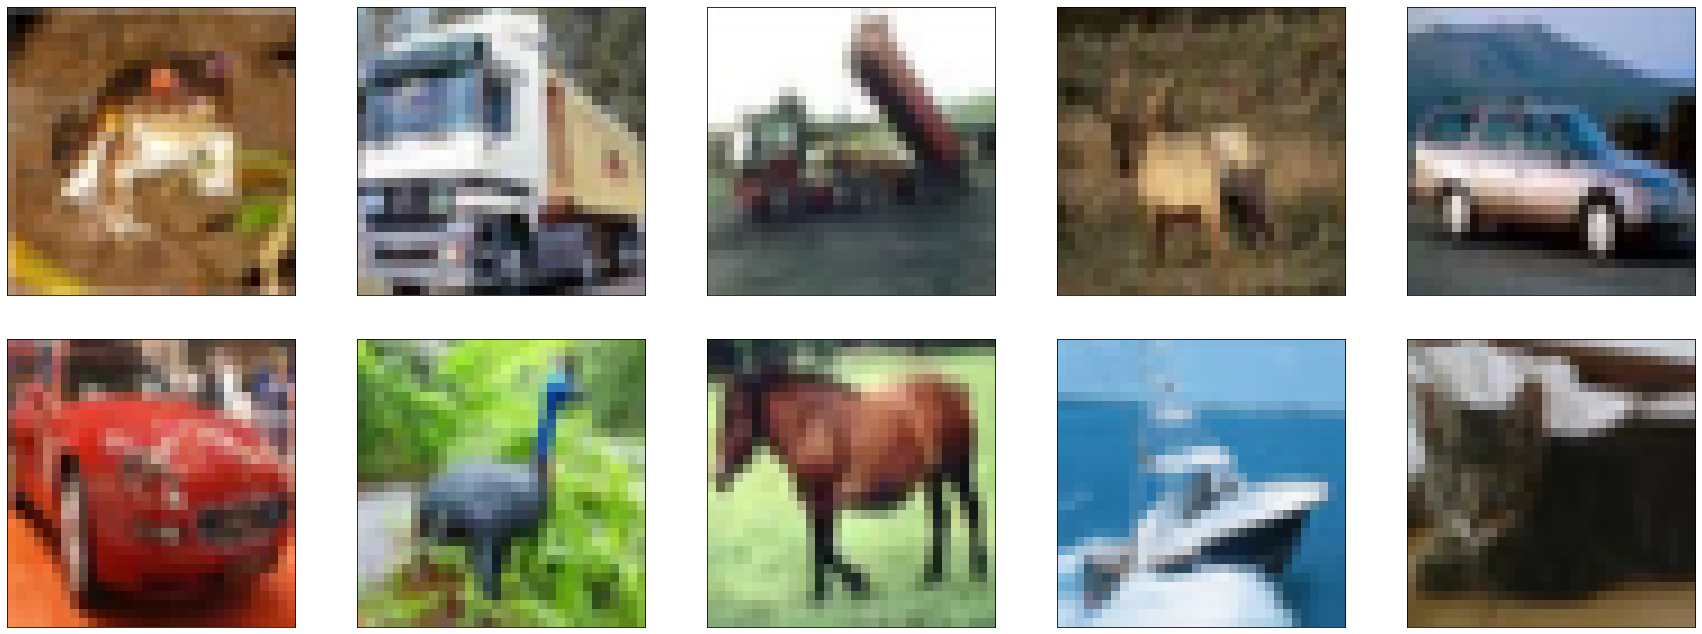

In [3]:
img=train_x[:10]

fig=plt.figure(figsize=(5*5,5*2))

for i in range(10):
  splot=fig.add_subplot(2, 5, i+1)
  splot.tick_params(
      axis='both',
      which='both',
      bottom=False,
      top=False,
      left=False,
      right=False,
      labelbottom=False,
      labelleft=False)
  splot.imshow(img[i])
  
fig.tight_layout(pad=5)
plt.show()

In [5]:
train_x,test_x=tf.cast(train_x,'float32')/255,tf.cast(train_x,'float32')/255
val_x,val_y=train_x[-10000:],train_y[-10000:]
train_x,train_y=train_x[:-10000],train_y[:-10000]

In [8]:
n=200

models=[]
for i in range(1,4):
  models.append(tf.keras.Sequential(
    [tf.keras.layers.Conv2D(32,[5,5], activation='relu') for j in range(i+1)]+
    [tf.keras.layers.MaxPooling2D((2,2))]+
    [tf.keras.layers.Flatten()]+
    [tf.keras.layers.Dense(128, activation='relu') for j in range(3)]+
    [tf.keras.layers.Dense(10, activation='softmax')],
    name='Modelo_'+str(i))
    )
  models[-1].compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(1e-3),
                metrics=['accuracy'])
history=[]

In [ ]:
history.append(
    models[0].fit(train_x,
              train_y,
              batch_size=512,
              epochs=n,
              verbose=1,
              validation_data=(val_x,val_y),
              shuffle=False)
                    );

In [ ]:
history.append(
    models[1].fit(train_x,
              train_y,
              batch_size=64,
              epochs=n,
              verbose=1,
              validation_data=(val_x,val_y),
              shuffle=False)
                    );

In [ ]:
history.append(
    models[2].fit(train_x,
              train_y,
              batch_size=64,
              epochs=n,
              verbose=1,
              validation_data=(val_x,val_y),
              shuffle=False)
                    );

In [13]:
epoch1=history[0].history['accuracy']
epoch2=history[1].history['accuracy']
epoch3=history[2].history['accuracy']

best_acur_table=np.asarray([[max(history[0].history['accuracy']),
                             max(history[1].history['accuracy']),
                             max(history[2].history['accuracy'])],
                            [max(history[0].history['val_accuracy']),
                             max(history[1].history['val_accuracy']),
                             max(history[2].history['val_accuracy'])]])

import dill
with open('train_data1.csv','wb') as file:
    dill.dump([best_acur_table,epoch1,epoch2,epoch3],file)

In [5]:
n=200
history=[]

model_final=tf.keras.Sequential(
    [tf.keras.layers.Dropout(0.25)]+
    [tf.keras.layers.Conv2D(32,[5,5], activation='relu') for j in range(2)]+
    [tf.keras.layers.MaxPooling2D((2,2))]+
    [tf.keras.layers.Flatten()]+
    [tf.keras.layers.Dense(128, activation='relu') for j in range(3)]+
    [tf.keras.layers.Dropout(0.25)]+
    [tf.keras.layers.Dense(10, activation='softmax')],
    name='Modelo_'+str(i))

model_final.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(1e-3),
                metrics=['accuracy'])

In [ ]:
history.append(
    model_final.fit(train_x,
              train_y,
              batch_size=512,
              epochs=n,
              verbose=1,
              validation_data=(val_x,val_y),
              shuffle=False)
                    );

In [14]:
import dill
with open('train_data2.csv','wb') as file:
    dill.dump([history[0].history['accuracy'],history[0].history['val_accuracy']],file)

In [10]:
n=200
history=[]

λ=0.0

model_final=tf.keras.Sequential(
    [tf.keras.layers.Conv2D(128,[3,1], activation=tf.math.abs,kernel_regularizer=tf.keras.regularizers.l2(λ))]+
    [tf.keras.layers.Conv2D(64,[3,1], activation=tf.math.abs,kernel_regularizer=tf.keras.regularizers.l2(λ))]+
    [tf.keras.layers.Conv2D(128,[1,3], activation=tf.math.abs,kernel_regularizer=tf.keras.regularizers.l2(λ))]+
    [tf.keras.layers.Conv2D(64,[1,3], activation=tf.math.abs,kernel_regularizer=tf.keras.regularizers.l2(λ))]+
    [tf.keras.layers.Conv2D(128,[3,1], activation=tf.math.abs,kernel_regularizer=tf.keras.regularizers.l2(λ))]+
    [tf.keras.layers.Conv2D(64,[3,1], activation=tf.math.abs,kernel_regularizer=tf.keras.regularizers.l2(λ))]+
    [tf.keras.layers.Conv2D(128,[1,3], activation=tf.math.abs,kernel_regularizer=tf.keras.regularizers.l2(λ))]+
    [tf.keras.layers.Conv2D(64,[1,3], activation=tf.math.abs,kernel_regularizer=tf.keras.regularizers.l2(λ))]+
    [tf.keras.layers.MaxPooling2D((2,2))]+
    [tf.keras.layers.Flatten()]+
    [tf.keras.layers.Dense(256, activation=tf.math.abs,kernel_regularizer=tf.keras.regularizers.l2(0.01)) for j in range(3)]+
    [tf.keras.layers.Dropout(0.50)]+
    [tf.keras.layers.Dense(10, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.01))],
    name='Modelo_'+str(i))

model_final.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(1e-3),
                metrics=['accuracy'])

In [11]:
history.append(
    model_final.fit(train_x,
              train_y,
              batch_size=512,
              epochs=n,
              verbose=1,
              validation_data=(val_x,val_y),
              shuffle=False)
                    );

Epoch 1/200
59/59 [==============================] - 14s 216ms/step - loss: 5.4707 - accuracy: 0.0984 - val_loss: 3.0938 - val_accuracy: 0.0963
Epoch 2/200
59/59 [==============================] - 13s 214ms/step - loss: 2.6219 - accuracy: 0.1018 - val_loss: 2.3761 - val_accuracy: 0.0981
Epoch 3/200
59/59 [==============================] - 13s 214ms/step - loss: 2.3291 - accuracy: 0.1018 - val_loss: 2.3077 - val_accuracy: 0.0981
Epoch 4/200
59/59 [==============================] - 13s 215ms/step - loss: 2.3044 - accuracy: 0.1014 - val_loss: 2.3031 - val_accuracy: 0.0981
Epoch 5/200
59/59 [==============================] - 13s 215ms/step - loss: 2.3028 - accuracy: 0.1014 - val_loss: 2.3028 - val_accuracy: 0.0981
Epoch 6/200
59/59 [==============================] - 13s 216ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3028 - val_accuracy: 0.0981
Epoch 7/200
59/59 [==============================] - 13s 216ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3028 - val_accuracy:

KeyboardInterrupt: 

In [14]:
import dill
with open('train_data2.csv','wb') as file:
    dill.dump([history[0].history['accuracy'],history[0].history['val_accuracy']],file)